# (9주차) 5월2일 -- lecture

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 경사하강법과 확률적경사하강법

`-` 10개의 샘플이 있다고 가정. $\{(x_i,y_i)\}_{i=1}^{10}$

### ver1: 모든 샘플을 사용하여 slope계산

(epoch1) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

...

### ver2: 하나의 샘플만 사용하여 slope계산 

(epoch1) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

### ver3: $m(\leq n)$개의 샘플만 사용하여 slope계산

$m=3$이라고 하자. 

(epoch1) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

### 용어의 정리 

#### 옛날 (좀 더 엄밀)

`-` ver1: gradient descent, batch gradient descent 


`-` ver2: stochastic gradient descent

`-` ver3: mini-batch gradient descent, mini-batch stochastic gradient descent

#### 요즘 

`-` ver1: gradient descent


`-` ver2: stochastic gradient descent with batch size = 1 

`-` ver3: stochastic gradient descent 
- https://www.deeplearningbook.org/contents/optimization.html, 알고리즘 8-1 참고. 

note: 이렇게 많이 쓰는 이유? ver1,2는 사실상 없는 방법이므로

### ver1,2,3 이외에 좀 더 지저분한 것들이 있다. 

`-` ver2,3에서 샘플을 셔플할 수도 있다. 

`-` ver3에서 일부 샘플이 학습에 참여 안하는 버전도 있다. 

`-` 개인적 생각: 너무 더럽다 그냥.. (딱히 엄청난 효과가 있는것도 아니고 각 방법마다 이론이 있는것도 아님) 

### Discussion 

`-` 핵심개념 
- **메모리사용량: ver1 > ver3 > ver2**
- 계산속도: ver1 > ver3 > ver2 
- local-min에 갇힘: ver1 > ver3 > ver2

`-` 본질: GPU 메모리가 한정되어 있어서 ver1을 쓰지는 못한다. GPU 메모리를 가장 적게쓰는것은 ver2인데 이것은 너무 불안정하다. 

`-` 틀리진 않지만 어색한 블로그 정리 내용들 
- 경사하강법은 종종 국소최소점에 갇히는 문제가 있다. 이를 해결하기 위해서 등장한 방법이 확률적 경사하강법이다. --> 어쩌다 보니까 확률적 경사하강법이 더 잘 빠져나오는것 
- 경사하강법은 계산시간이 오래걸린다. 계산을 빠르게 하기 위해서 등장한 방법이 확률적 경사하강법이다. --> 그렇기는 한데 최종적으로 얻는 결과는 무엇이 더 빠른지 모름 


## fashion_mnist 모듈 

### tf.keras.datasets.fashion_mnist.load_data()

In [4]:
type(tf.keras.datasets.fashion_mnist)

module

In [5]:
type(tf.keras.datasets.fashion_mnist.load_data)

function

### 데이터생성 및 탐색

`-` tf.keras.datasets.fashion_mnist.load_data()를 이용한 데이터 생성 

In [36]:
tf.keras.datasets.fashion_mnist.load_data??

Signature: tf.keras.datasets.fashion_mnist.load_data()
Source:   
@keras_export('keras.datasets.fashion_mnist.load_data')
def load_data():
  """Loads the Fashion-MNIST dataset.

  This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
  along with a test set of 10,000 images. This dataset can be used as
  a drop-in replacement for MNIST.

  The classes are:

  | Label | Description |
  |:-----:|-------------|
  |   0   | T-shirt/top |
  |   1   | Trouser     |
  |   2   | Pullover    |
  |   3   | Dress       |
  |   4   | Coat        |
  |   5   | Sandal      |
  |   6   | Shirt       |
  |   7   | Sneaker     |
  |   8   | Bag         |
  |   9   | Ankle boot  |

  Returns:
    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

  **x_train**: uint8 NumPy array of grayscale image data with shapes
    `(60000, 28, 28)`, containing the training data.

  **y_train**: uint8 NumPy array of labels (integers in range 0-9)
    with shape `(60000,)` for the t

`-` 함수의 return값을 확인하면 (x_train, y_train), (x_test, y_test)로 결과를 받아야 코드가 예뻐짐을 알 수 있다. 

In [37]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

`-` 데이터의 확인 

In [38]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

- x는 60000개의 관측치(이미지의 수)를 가지고 있는듯 보인다. 
- 하나의 obs에 대한 x의 차원은 (28,28)이다. 
- 하나의 obs에 대한 y의 차원은 스칼라다. 

In [39]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

- train과 test의 비율을 6:1로 나눔 

`-` 하나의 관측치가 무엇을 의미할까? 

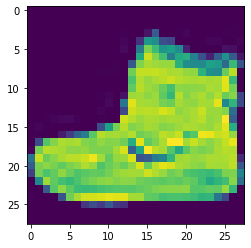

In [40]:
plt.imshow(x_train[0])

- 신발?

In [41]:
y_train[0]

9

- 신발이미지=x, 신발임의의미하는숫자9=y

In [11]:
np.where(y_train == 9)

(array([    0,    11,    15, ..., 59932, 59970, 59978]),)

- y==9인 다른 obs조사 

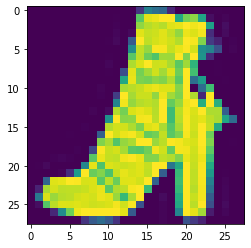

In [12]:
plt.imshow(x_train[11])

- obs0과 유사함

In [32]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### 데이터구조 

In [35]:
x_train.shape

(60000, 28, 28)

- $\bf{X}$: (n,28,28)
- $\bf{y}$: (n,)

## 예제1

### 데이터 정리 

`-` y=0,1에 대응하는 이미지만 정리하자. (우리가 배운건 로지스틱이니깐) 

### 풀이1: 은닉층을 포함한 신경망  // epochs=100

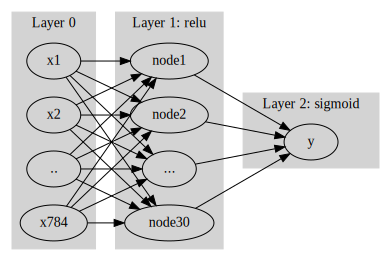

In [15]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "y"
    "node2" -> "y"
    "..." -> "y"
    "node30" -> "y"
    label = "Layer 2: sigmoid"
}
''')

### 풀이2: 옵티마이저 개선

### 풀이3: 컴파일시 metrics=['accuracy'] 추가

### 풀이4: 확률적경사하강법 이용 // epochs=10

## 예제2

### 데이터정리 

### 풀이1: 아까 예제1 정도의 모델로! (ephocs=20)

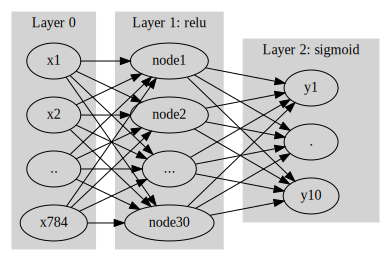

In [54]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "y10"
    "node2" -> "y10"
    "..." -> "y10"
    "node30" -> "y10"
    
    "node1" -> "y1"
    "node2" -> "y1"
    "..." -> "y1"
    "node30" -> "y1"
    
    "node1" -> "."
    "node2" -> "."
    "..." -> "."
    "node30" -> "."
    
    label = "Layer 2: sigmoid"
}
''')

### 풀이2: 더 깊은 신경망 

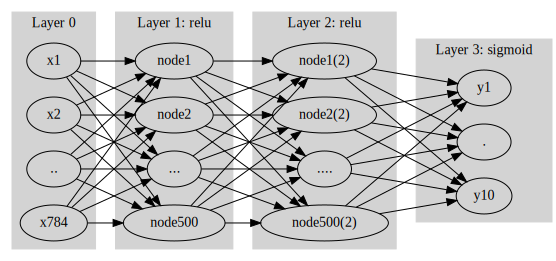

In [55]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node500"
    "x2" -> "node500"
    ".." -> "node500"
    "x784" -> "node500"


    label = "Layer 1: relu"
}

subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "node1(2)"
    "node2" -> "node1(2)"
    "..." -> "node1(2)"
    "node500" -> "node1(2)"

    "node1" -> "node2(2)"
    "node2" -> "node2(2)"
    "..." -> "node2(2)"
    "node500" -> "node2(2)"
    
    "node1" -> "...."
    "node2" -> "...."
    "..." -> "...."
    "node500" -> "...."
    
    "node1" -> "node500(2)"
    "node2" -> "node500(2)"
    "..." -> "node500(2)"
    "node500" -> "node500(2)"

    
    label = "Layer 2: relu"
}

subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1(2)" -> "y10"
    "node2(2)" -> "y10"
    "...." -> "y10"
    "node500(2)" -> "y10"
    
    "node1(2)" -> "y1"
    "node2(2)" -> "y1"
    "...." -> "y1"
    "node500(2)" -> "y1"
    
    "node1(2)" -> "."
    "node2(2)" -> "."
    "...." -> "."
    "node500(2)" -> "."
    
    label = "Layer 3: sigmoid"
}
''')

### 데이터 다시 정리 (데이터 자체를 2D로 해석하자) 

`-` 데이터를 다시 정리 // X를 펼치치 않음 + 이미지의 차원을 (28,28,1)로 통일.

### 풀이3: CNN